In [ ]:
import numpy as np
#group assignment
def group_assignment(data,centroids):
    grouping_vec_c=np.zeros(len(data))
    for i in range(len(data)):
        dist=np.zeros(len(centroids))
        for j in range(len(centroids)):
            dist[j]=np.linalg.norm(data[i]-centroids[j])
        min_dist=min(dist)
        for j in range(len(centroids)):
            if min_dist==dist[j]:
                grouping_vec_c[i]=j+1
    return grouping_vec_c

In [2]:
#update centroids
def update_centroids(data,grouping,centroids):
    new_centroids=[]
    for i in range(len(centroids)):
        cent=np.zeros(len(data[0])) #列表长度为向量长度
        count=0
        for j in range(len(data)):
            if grouping[j]==(i+1): #此向量属于此簇
                cent=cent+data[j]
                count+=1
        group_average=cent/count #centroids是本簇向量的mean值
        new_centroids.append(group_average)
    return new_centroids

In [ ]:
#clustering objective
def clustering_objective(data,grouping,centroids):
    j_obj=0
    for i in rnage(len(data)):
        for j in range(len(centroids)):
            if grouping[i]==(j+1):
                j_obj+=np.linalg.norm(data[i]-centroids[j])**2
    j_obj=j_obj/len(data)
    return j_obj     

In [ ]:
#k-means algorithm
def kmeans_alg(data,centroids):
    iteration=0
    j_obj_vector=[]
    stop=flase
    while stop==false:
        grouping=group_assignment(data,centroids)
        new_centroids=update_centroid(data,grouping,centroids)
        j_obj=clustering_objective(data,grouping,new_centroids)
        j_obj_vector.append(j_obj)#the change process of clustering objective
        iteration+=1
        if np.linalg.norm(np.array(new_centroids)-np.array(centroids))<1e-6:
            stop=True
        else:
            centroids=new_centroids
    return new_centroids,grouping,j_obj_vector,iteration

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans=KMeans(n_clusters=4,random_state=0).fit(data)#簇分配
labels=kmeans.labels_#样本所属的簇
group_representative=kmeans.cluster_centers_#簇代表
j_clust=kmeans.inertia_#迭代次数

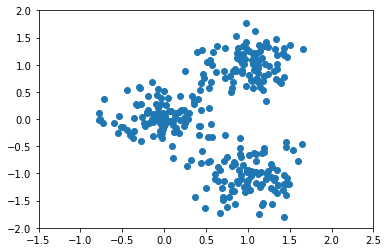

In [5]:
import matplotlib.pyplot as plt
import numpy as np
plt.ion()
x=np.concatenate([[0.3*np.random.randn(2) for i in range(100)],[[1,1]+0.3*np.random.randn(2) for i in range(100)],[[1,-1]+0.3*np.random.randn(2) for i in range(100)]])
plt.scatter(x[:,0],x[:,1])
plt.xlim(-1.5,2.5)
plt.ylim(-2,2)
plt.show()

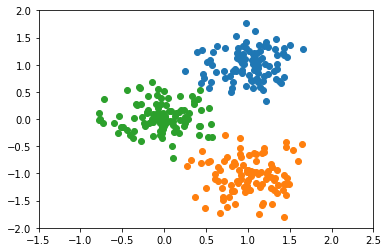

In [9]:
from sklearn.cluster import KMeans
import numpy as np
kmeans=KMeans(n_clusters=3,random_state=0).fit(x)
labels=kmeans.labels_
group_representative=kmeans.cluster_centers_
j_cluster=kmeans.inertia_

grps=[[x[i,:] for i in range(300) if labels[i]==j] for j in range(3)]
plt.scatter([c[0] for c in grps[0]],[c[1] for c in grps[0]])
plt.scatter([c[0] for c in grps[1]],[c[1] for c in grps[1]])
plt.scatter([c[0] for c in grps[2]],[c[1] for c in grps[2]])
plt.xlim(-1.5,2.5)
plt.ylim(-2,2)
plt.show()